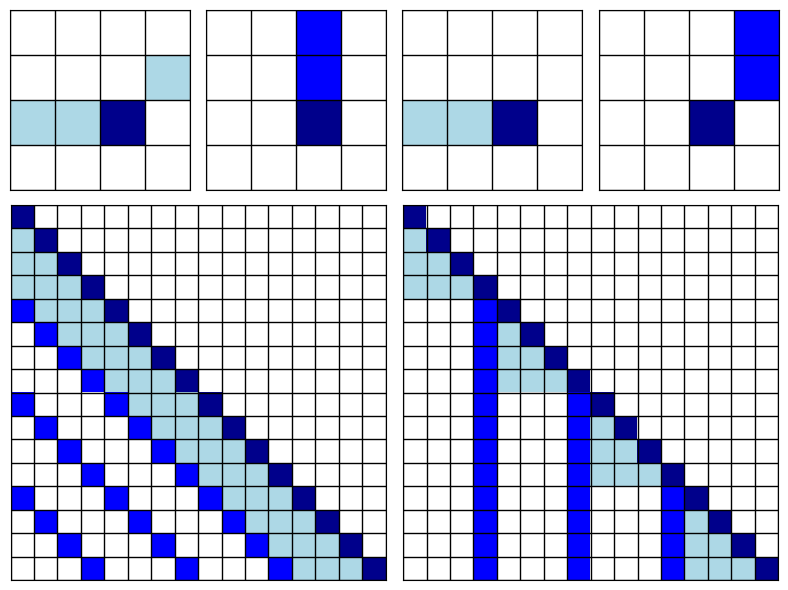

In [26]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np


def att1(i, j, l, x=None):
    if j > i: return 0
    if i == j: return 1
    if j < i and j > i - l and (x is None or x == 0): return 0.3
    if i % l == j % l and j < i and (x is None or x == 1): return 0.6

def att2(i, j, l, x=None):
    if j > i: return 0
    if i == j: return 1
    if j // l == i // l and (x is None or x == 0): return 0.3
    if j % l == l - 1 and j < i and (x is None or x == 1): return 0.6

def apply_att(att, size, ti, tj, x=None):
    a = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            a[i,j] = att(ti * size + tj, i * size + j, size, x)
    return a

def apply_att_all(att, size):
    a = np.zeros((size*size, size*size))
    for i in range(size*size):
        for j in range(size*size):
            a[i,j] = att(i, j, size)
    return a

def draw_att(ax, a):
    cmap = plt.cm.colors.ListedColormap(['white','lightblue','blue','darkblue'])
    ax.imshow(a, cmap=cmap, interpolation='none')
    ax.grid(True, which='both', color='black', linewidth=1)
    ax.set_xticks(np.arange(-0.5, a.shape[1], 1), [])
    ax.set_yticks(np.arange(-0.5, a.shape[0], 1), [])
    ax.tick_params(bottom=False, left=False)
    
n = 4
xi = 2
xj = 2
a1 = apply_att(att1, n, xi, xj, 0)
a2 = apply_att(att1, n, xi, xj, 1)
a3 = apply_att(att2, n, xi, xj, 0)
a4 = apply_att(att2, n, xi, xj, 1)
ag1 = [a1, a2, a3, a4]
a5 = apply_att_all(att1, n)
a6 = apply_att_all(att2, n)
ag2 = [a5, a6]

fig = plt.figure(figsize=(8, 6), tight_layout=True)
gs = GridSpec(3, 4)
for i in range(4):
    ax = fig.add_subplot(gs[0,i])
    draw_att(ax, ag1[i])
for i in range(2):
    ax = fig.add_subplot(gs[1:,i*2:i*2+2])
    draw_att(ax, ag2[i])

# plt.show()
plt.savefig('strided_fix_attention.png', dpi=600, bbox_inches='tight')